In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px  #for map plot
import json #for Geojson data

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-RTL5926;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')    
                      


In [2]:
 #set a default place for fig to be shown without making it so heavy for Jupiter Note
import plotly.io as pio
pio.renderers.default='browser'

In [3]:
#check the top performance country
Top_performing_country=pd.read_sql_query('SELECT * from top_performing_country',conn)
print(Top_performing_country)

  country_code  country_sales
0           US   2.641106e+07


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [4]:
#create a df of regional sales in the US
region_sales_US=pd.read_sql_query('SELECT * from region_sales_US',conn)
region_sales_US=region_sales_US.sort_values('Sales_YTD')
print(region_sales_US)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



      region     Sales_YTD  Sales_LastYear  Total_Sales_Quota  \
1  Northeast  8.455663e+08    1.269716e+09       1.056000e+08   
0    Central  1.182787e+09    1.233930e+09       9.625000e+07   
3  Southeast  1.233792e+09    1.907585e+09       1.458000e+08   
2  Northwest  1.087012e+11    4.546261e+10       3.675200e+09   
4  Southwest  1.308391e+11    6.680313e+10       3.112000e+09   

   Commission_Percentage  Number_Customers  Average_Order_Value Sales_Category  
1                 0.0120                57         2.402177e+06  High priority  
0                 0.0150                69         3.072175e+06  High priority  
3                 0.0100                91         2.538667e+06  High priority  
2                 0.0136              3428         2.366156e+07   Low priority  
4                 0.0125              4565         2.102171e+07   Low priority  


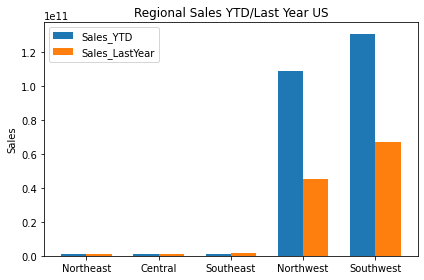

In [5]:
#plot the double bar chart of regional sales performance YTD and Last Year
labels = region_sales_US['region']
Sales_YTD = region_sales_US['Sales_YTD']
Sales_LastYear=region_sales_US['Sales_LastYear']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Sales_YTD, width, label='Sales_YTD')
rects2 = ax.bar(x + width/2, Sales_LastYear, width, label='Sales_LastYear')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Regions')
ax.set_ylabel('Sales')
ax.set_title('Regional Sales YTD/Last Year US')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

In [6]:
#the double bar chart have provided information about the diferences earch region
#but it has not show clearly the changes in percentage and total sales each period
#the below codes are for making a double pie chart to provide the missing information
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#set the labels, titles for the pies
labels = region_sales_US['region']
sum_YTD=region_sales_US['Sales_YTD'].sum()
sum_LY=region_sales_US['Sales_LastYear'].sum()
textYTD='Sales YTD: '+str("{:,}".format(round(sum_YTD))) #add the total number of sale YTD
textLY='Sales Last Year: '+ str("{:,}".format(round(sum_LY))) #add the total number of Sales Last Year

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]])
                    #subplot_titles=['YTD', 'Last Year'])
#create the 2 pies
fig.add_trace(go.Pie(labels=labels, values=region_sales_US['Sales_YTD'], scalegroup='one',
                     name="Sales YTD"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=region_sales_US['Sales_LastYear'], scalegroup='one',
                     name="Sales Last Year"), 1, 2)
#was thinking of makeing a donut but i changed my mind
#make holes for donut charts
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
#update layout with title and donut titles
fig.update_layout(
    title_text='Regional Sales YTD/ Last Year in the US',
    # Add annotations in the center of the donut pies.
    annotations=[dict(text=(textYTD), x=0.11, y=-0.1, font_size=18, showarrow=False),
                 dict(text=(textLY), x=0.93, y=-0.1, font_size=18, showarrow=False)])
fig.show()

In [7]:
#the pie chart and bar chart show some differences about the sales YTD and Last Year.
#clearly, sales YTD is significantly higher that one Last year
# let's find out in which period the sale value is collected
latest_order_time=pd.read_sql_query('select max(OrderDate) from sales.SalesOrderHeader',conn)
print(latest_order_time)
#surprisingly, the YTD period is the first 6month of 2014

            
0 2014-06-30


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [8]:
#Stated to map the regions

In [9]:

#read Geojson file about US geography
US_states = json.load(open('D:/2022/GENERATION/PROJECT_1/gz_2010_us_040_00_20m.json','r')) 
US_states['features'][2] #to check the value of geojson file, noticing the ID is the 'STATE' feature

{'type': 'Feature',
 'properties': {'GEO_ID': '0400000US06',
  'STATE': '06',
  'NAME': 'California',
  'LSAD': '',
  'CENSUSAREA': 155779.22},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-120.248484, 33.999329],
     [-120.247393, 34.001911],
     [-120.238657, 34.007592],
     [-120.230001, 34.010136],
     [-120.221287, 34.010367],
     [-120.208478, 34.005655],
     [-120.19578, 34.004284],
     [-120.167306, 34.008219],
     [-120.151663, 34.018126],
     [-120.147647, 34.024831],
     [-120.140362, 34.025974],
     [-120.135853, 34.026087],
     [-120.115058, 34.019866],
     [-120.090182, 34.019806],
     [-120.073609, 34.024477],
     [-120.062778, 34.031161],
     [-120.061953, 34.033976],
     [-120.057637, 34.03734],
     [-120.055107, 34.037729],
     [-120.043259, 34.035806],
     [-120.044004, 34.02482],
     [-120.047798, 34.021227],
     [-120.050382, 34.013331],
     [-120.048926, 34.009898],
     [-120.046575, 34.000002],
     [-120.041311, 33.994507],


In [10]:
#create a dict including names and ids of states
state_id_map={}     
for feature in US_states['features']:
    feature['id']=feature['properties']['STATE']
    state_id_map[feature['properties']['NAME']]=feature['id']
print(state_id_map) 

{'Arizona': '04', 'Arkansas': '05', 'California': '06', 'Colorado': '08', 'Connecticut': '09', 'District of Columbia': '11', 'Georgia': '13', 'Hawaii': '15', 'Illinois': '17', 'Indiana': '18', 'Louisiana': '22', 'Minnesota': '27', 'Mississippi': '28', 'Montana': '30', 'New Mexico': '35', 'North Dakota': '38', 'Oklahoma': '40', 'Pennsylvania': '42', 'Tennessee': '47', 'Virginia': '51', 'Puerto Rico': '72', 'Delaware': '10', 'West Virginia': '54', 'Wisconsin': '55', 'Wyoming': '56', 'Alabama': '01', 'Alaska': '02', 'Florida': '12', 'Idaho': '16', 'Kansas': '20', 'Maryland': '24', 'New Jersey': '34', 'North Carolina': '37', 'South Carolina': '45', 'Washington': '53', 'Vermont': '50', 'Utah': '49', 'Iowa': '19', 'Kentucky': '21', 'Maine': '23', 'Massachusetts': '25', 'Michigan': '26', 'Missouri': '29', 'Nebraska': '31', 'Nevada': '32', 'New Hampshire': '33', 'New York': '36', 'Ohio': '39', 'Oregon': '41', 'Rhode Island': '44', 'South Dakota': '46', 'Texas': '48'}


In [11]:
US_sales = pd.read_excel('D:/2022/GENERATION/PROJECT_1/US-states_sales.xlsx')  #read states_sales excel file
US_sales['State']=US_sales['State'].str.strip() #trim unwanted spaces, otherwise, it can't be match with state_id_map (this takes me many hours for this)
print(US_sales)

                   State Region  Sales_YTD  Sales_LastYear
0                Alabama     SE    2538667         3925071
1                 Alaska     NW    7887187         3298694
2                Arizona     SW   10510850         5366576
3               Arkansas     SE    2538667         3925071
4             California     NW    7887187         3298694
5               Colorado     NW    7887187         3298694
6            Connecticut     NE    2402177         3607149
7               Delaware     SE    2538667         3925071
8   District of Columbia     SE    2538667         3925071
9                Florida     SE    2538667         3925071
10               Georgia     SE    2538667         3925071
11                Hawaii     NW    7887187         3298694
12                 Idaho     NW    7887187         3298694
13              Illinois     CT    3072175         3205014
14               Indiana     CT    3072175         3205014
15                  Iowa     CT    3072175         32050

In [12]:
#add the id to link the sales tata with the geojson data using lambda x
US_sales['id'] = US_sales['State'].apply(lambda x: state_id_map[x])
print(US_sales)

                   State Region  Sales_YTD  Sales_LastYear  id
0                Alabama     SE    2538667         3925071  01
1                 Alaska     NW    7887187         3298694  02
2                Arizona     SW   10510850         5366576  04
3               Arkansas     SE    2538667         3925071  05
4             California     NW    7887187         3298694  06
5               Colorado     NW    7887187         3298694  08
6            Connecticut     NE    2402177         3607149  09
7               Delaware     SE    2538667         3925071  10
8   District of Columbia     SE    2538667         3925071  11
9                Florida     SE    2538667         3925071  12
10               Georgia     SE    2538667         3925071  13
11                Hawaii     NW    7887187         3298694  15
12                 Idaho     NW    7887187         3298694  16
13              Illinois     CT    3072175         3205014  17
14               Indiana     CT    3072175         3205

In [13]:
#plot the map comparing the regional sales value YTD, result will be shown in browser
px.choropleth(US_sales,locations='id', 
                geojson=US_states,
                color='Sales_YTD',
                scope='usa',
                hover_name='State',
                hover_data=['Sales_YTD'],
                range_color=(2000000,1.1e+07), #this is to keep the color scale the same for the 2 periods
                title='US Regional Sales YTD')


In [14]:
#plot the map comparing the regional sales value last year, result will be shown in browser
px.choropleth(US_sales,locations='id', 
                geojson=US_states,
                color='Sales_LastYear',
                scope='usa',
                hover_name='State',
                range_color=(2000000,1.1e+07), #this is to keep the color scale the same for the 2 periods
                hover_data=['Sales_LastYear'],
                title='US Regional Sales Last Year')

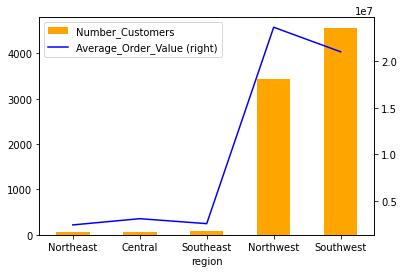

In [22]:

# Create the figure and axes object
from matplotlib.pyplot import bar


fig, ax = plt.subplots()
# Plot the first x and y axes:
region_sales_US.plot(
    x='region', 
    kind='bar',
    y='Number_Customers', 
    ax=ax, 
    color='orange'
)
# Plot the second x and y axes. 
# By secondary_y = True a second y-axis is requested
region_sales_US.plot(
    x='region', 
    y='Average_Order_Value', 
    ax=ax, 
    secondary_y=True, 
    color='blue'
)
plt.show()